## Import Libraries

In [ ]:
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import random

np.random.seed(42)
tf.random.set_seed(42);

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Homework1/training_set.npz'

Mounted at /content/drive


In [ ]:
data = np.load(dataset_path)
X = data['images']
y = data['labels'].flatten()

## PreProcessing

### Find similar images

### Divide the images in the dataset per label and then preprocess them

In [ ]:
import matplotlib.pyplot as plt

images_0 = []

for ind, x in enumerate(X):
  if(y[ind] == 0):
    images_0.append(x)

print(len(images_0))

1052


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained VGG16 model with top excluded for feature extraction
model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Function to extract features from an image
def extract_features_from_array(img_array, model):
    img_data = np.expand_dims(img_array, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

# Function to find similar images in a dataset loaded from an .npz file
def find_similar_images(X, label_j, threshold=0.95):

    # Extract features for all images
    features_list = [extract_features_from_array(img, model) for img in X]

    # Compute the similarity matrix
    similarity_matrix = cosine_similarity(features_list)

    # Find indices of similar images based on the threshold
    removed_indices = []
    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            if similarity_matrix[i, j] > threshold:
                removed_indices.append(j)

    # Remove duplicates and keep unique indices
    removed_indices = list(set(removed_indices))

    # Output the list of removed indices
    print("Indices of removed images:", removed_indices)
    return removed_indices

# Usage
removed_indices = find_similar_images(images_0, label_j=0, threshold=0.95)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1

### Showing the most similar images

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image

def display_similar_images_table(dataset, similar_indices):
  """
  Displays images in similar_indices in a grid format, grouped by label.
  """

  fig, axes = plt.subplots(len(similar_indices), 1, figsize=(10, len(similar_indices) * 5))
  fig.tight_layout(pad=5.0)

  for i, (label, indices) in enumerate(similar_indices.items()):
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')  # Remove axis for the subplot

    # Calculate grid dimensions to fit images within the subplot
    num_images = len(indices)
    grid_rows = int(np.ceil(np.sqrt(num_images)))
    grid_cols = int(np.ceil(num_images / grid_rows))

    # Display images in a grid within the subplot
    for j, idx in enumerate(indices):
      image = Image.fromarray(dataset[idx])
      row = j // grid_cols
      col = j % grid_cols
      inner_ax = axes[i].inset_axes([col / grid_cols, 1 - (row + 1) / grid_rows, 1 / grid_cols, 1 / grid_rows])
      inner_ax.imshow(image)
      inner_ax.axis('off')

  plt.show()


#Display only the similar images

### Split Data

Number of unused images: 5367
Train label distribution: Counter({7: 734, 3: 734, 6: 734, 2: 734, 1: 734, 5: 734, 0: 734, 4: 734})
Validation label distribution: Counter({7: 209, 3: 209, 6: 209, 2: 209, 1: 209, 5: 209, 0: 209, 4: 209})
Test label distribution: Counter({7: 106, 3: 106, 6: 106, 2: 106, 1: 106, 5: 106, 0: 106, 4: 106})


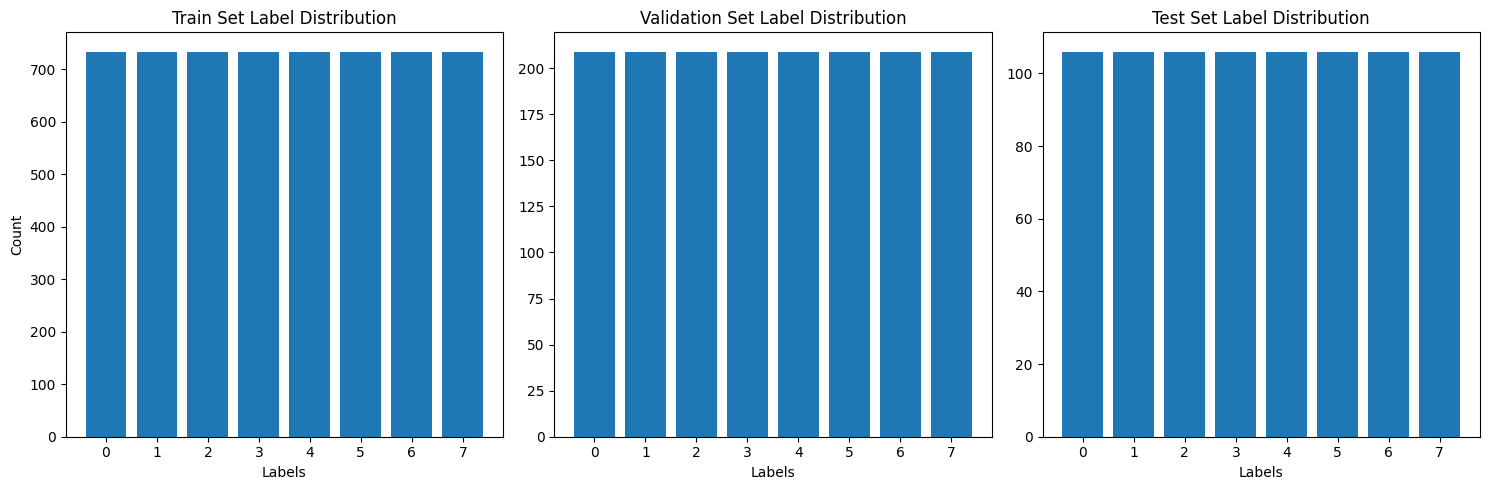

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Determine the minimum number of images for each class
label_counts = Counter(y)
min_count = min(label_counts.values())

# Indices for each label
indices_by_label = {label: np.where(y == label)[0] for label in label_counts.keys()}

# Initial split to create balanced train, val, and test sets
train_indices, val_indices, test_indices, unused_indices = [], [], [], []

for label, indices in indices_by_label.items():
    # Select the balanced initial samples
    train_size = int(0.7 * min_count)
    val_size = int(0.2 * min_count)
    test_size = min_count - train_size - val_size

    train_indices.extend(indices[:train_size])
    val_indices.extend(indices[train_size:train_size + val_size])
    test_indices.extend(indices[train_size + val_size:train_size + val_size + test_size])

    # Add any remaining indices to unused
    unused_indices.extend(indices[min_count:])

# Convert lists to arrays for easy indexing
train_indices = np.array(train_indices)
val_indices = np.array(val_indices)
test_indices = np.array(test_indices)
unused_indices = np.array(unused_indices)

# Create the datasets using the indices
X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]
X_test, y_test = X[test_indices], y[test_indices]

# Print the number of unused images
print("Number of unused images:", len(unused_indices))

# Verify the distribution in each split
print("Train label distribution:", Counter(y_train))
print("Validation label distribution:", Counter(y_val))
print("Test label distribution:", Counter(y_test))

# Plot the distribution for each split to confirm balance
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(Counter(y_train).keys(), Counter(y_train).values())
ax[0].set_title('Train Set Label Distribution')
ax[0].set_xlabel('Labels')
ax[0].set_ylabel('Count')

ax[1].bar(Counter(y_val).keys(), Counter(y_val).values())
ax[1].set_title('Validation Set Label Distribution')
ax[1].set_xlabel('Labels')

ax[2].bar(Counter(y_test).keys(), Counter(y_test).values())
ax[2].set_title('Test Set Label Distribution')
ax[2].set_xlabel('Labels')

plt.tight_layout()
plt.show()

## Train and Save the Model

### Tunable parameters

In [ ]:
# Tunable parameters
params = {
    "batch_size": 32,
    "epochs": 1000,
    "learning_rate": 0.001,
    "image_size": (96, 96),       # Image size for MobileNetV2
    "num_classes": 8,             # Adjust this according to the actual number of classes in your data

    "validation_interval": 10,    # Interval to log validation data
    "save_interval": 40,          # Interval to save the model
    "plot_interval": 10,          # Interval to save the loss and accuracy plot

    "network_name": "Net02_Train03_lr01",   # Name of the network for naming saved models and logs
    "latest_model_path": "",  # Path of the importing net - only from netoutput folder

    "network_arch": 1 # Netowrk Architecture
    # Net 0 = MobileNetV2
    # Net 1 = Conv, max pool, conv, max pool, dense, dense
}

In [ ]:
# File paths
output_dir = '/content/drive/My Drive/Homework1/net_output'  # Directory to save logs, plots, and models
# Create a subfolder within `net_output` for the model based on the network name

model_output_dir = os.path.join(output_dir, params["network_name"])
os.makedirs(model_output_dir, exist_ok=True)  # Create the model-specific output directory if it doesn't exist


### Model

HERE WE USED A SINGLE SCRIPT TO TEST OUR SIMPLE NET AND THE MOBILE NET ARCHITECTURE.

**In particular, those results are obtained with the custom network.**

In [ ]:
class Model:
  def __init__(self, input_shape, num_classes, learning_rate):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.learning_rate = learning_rate

        #Build the model
        if(params["network_arch"] == 0):
          self.model = self.build_model00()
        elif(params["network_arch"] == 1):
          self.model = self.build_model01()
        else:
          raise ValueError("Invalid network architecture")

  #TRANSFER LEARNING FROM MOBILE NET
  def build_model00(self):
        # Load MobileNetV2 with pretrained weights
        base_model = MobileNetV2(input_shape=self.input_shape,
                                 include_top=False,
                                 weights='imagenet',
                                 pooling='avg')  # Global Average Pooling
        base_model.trainable = False  # Freeze the base model

        # Build the full model with custom classification layers
        model = models.Sequential([
            base_model,
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(self.num_classes, activation='softmax')
        ])

        # Compile the model with the specified optimizer and loss
        model.compile(optimizer=optimizers.Adam(learning_rate=self.learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

  # 2 CONV + 2 DENSE LAYERS
  def build_model01(self):

        model = models.Sequential([
        #First Conv2D layer
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
        layers.MaxPooling2D((2, 2)),  # Optional pooling layer for down-sampling


        # Second Conv2D layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),  # Optional pooling layer for down-sampling


        # Flatten layer to transition to Dense layers
        layers.Flatten(),


        # Dense layers
        layers.Dense(128, activation='relu'),
        layers.Dense(self.num_classes, activation='softmax')
        ])


        # Compile the model with the specified optimizer and loss
        model.compile(optimizer=optimizers.Adam(learning_rate=self.learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

  def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        # Perform prediction
        preds = self.model.predict(X)

        # Convert predictions to class labels by taking the argmax of each prediction
        predicted_labels = np.argmax(preds, axis=1)

        return predicted_labels

###Trainer

In [ ]:
class Trainer:
    def __init__(self, model, params, X_train, y_train, X_val, y_val):
        self.model = model.model  # Access the Keras model directly
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.params = params

        # Define paths for logging and saving in the model-specific directory
        self.output_dir = model_output_dir
        self.network_name = self.params["network_name"]
        self.log_file_path = f"{self.output_dir}/{self.network_name}_training_log.txt"

        # Remove log file if it exists
        if os.path.exists(self.log_file_path):
            os.remove(self.log_file_path)

        # Log lists to store training/validation loss and accuracy
        self.train_loss_log = []
        self.val_loss_log = []

    def train(self):
        # Define the data generators
        train_datagen = ImageDataGenerator(rescale=1.0/255)
        val_datagen = ImageDataGenerator(rescale=1.0/255)

        # Prepare the data generators
        self.train_data = train_datagen.flow(self.X_train, self.y_train, batch_size=self.params["batch_size"])
        self.val_data = val_datagen.flow(self.X_val, self.y_val, batch_size=self.params["batch_size"])

        # Train the model for the specified number of epochs
        for epoch in range(self.params['epochs']):
            history = self.model.fit(
                self.train_data,
                validation_data=self.val_data,
                epochs=1,
                verbose=1
            )

            # Extract train and validation loss for logging
            train_loss = history.history['loss'][0]
            val_loss = history.history['val_loss'][0]
            val_accuracy = history.history['val_accuracy'][0]

            # Store loss values for plotting
            self.train_loss_log.append(train_loss)
            self.val_loss_log.append(val_loss)

            # Log to file every few epochs as specified
            if (epoch + 1) % self.params["validation_interval"] == 0:
                with open(self.log_file_path, "a") as f:
                    f.write(f"Epoch {epoch + 1}: Train Loss={train_loss:.4f}, "
                            f"Val Loss={val_loss:.4f}, Val Acc={val_accuracy:.4f}\n")
                print(f"Epoch {epoch + 1}: Train Loss={train_loss:.4f}, "
                      f"Val Loss={val_loss:.4f}, Val Acc={val_accuracy:.4f}")

            # Save the model every `save_interval` epochs
            if (epoch + 1) % self.params["save_interval"] == 0:
                model_path = f"{self.output_dir}/{self.network_name}_epoch_{epoch + 1}.keras"
                self.model.save(model_path)
                print(f"Model saved at epoch {epoch + 1}: {model_path}")

            # Plot and save the loss/accuracy graph every `plot_interval` epochs, overwriting the previous plot
            if (epoch + 1) % self.params["plot_interval"] == 0:
                plt.figure(figsize=(10, 5))
                plt.plot(range(1, len(self.train_loss_log) + 1), self.train_loss_log, label='Train Loss')
                plt.plot(range(1, len(self.val_loss_log) + 1), self.val_loss_log, label='Validation Loss')
                plt.xlabel('Epochs')
                plt.ylabel('Loss')
                plt.legend()
                plt.title('Training and Validation Loss Over Epochs')

                plot_path = f"{self.output_dir}/{self.network_name}_training_validation_loss.png"
                plt.savefig(plot_path)
                plt.close()
                print(f"Plot saved at {plot_path}")


###Run Train

In [ ]:
# Load data from the .npz file
X_train = data['images']
y_train = data['labels']

# Instantiate the model using ModelBuilder
model = Model(input_shape=(params["image_size"][0], params["image_size"][1], 3),
                             num_classes=params["num_classes"],
                             learning_rate=params["learning_rate"])

# Load the latest model checkpoint if it exists
latest_model_path = f"/content/drive/My Drive/[2024-2025] AN2DL/Homework 1/net_output/{params['latest_model_path']}.keras"
print(model_output_dir)
if os.path.exists(latest_model_path):
    model = tf.models.load_model(latest_model_path)
    print(f"Loaded model weights from {latest_model_path}")
else:
    print("No pre-trained model found. Starting from scratch.")

# Initialize and run the trainer
trainer = Trainer(model, params, X_train, y_train, X_val, y_val)
trainer.train()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/content/drive/My Drive/Homework1/net_output/Net02_Train03_lr01
No pre-trained model found. Starting from scratch.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.5459 - loss: 1.2482 - val_accuracy: 0.7530 - val_loss: 0.6611
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7967 - loss: 0.5509 - val_accuracy: 0.8690 - val_loss: 0.4546
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8368 - loss: 0.4362 - val_accuracy: 0.8427 - val_loss: 0.4361
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8576 - loss: 0.3676 - val_accuracy: 0.8648 - val_loss: 0.3302
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8654 - loss: 0.3412 - val_accuracy: 0.8672 - val_loss: 0.3096
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8722 - loss: 0.3198 - val_accuracy: 0.8744 - val_loss: 0.2775
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8757 - loss: 0.3064 - val_accuracy: 0.8810 - val_loss: 0.2689
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8854 - loss: 0.2846 - val_accuracy: 0.8786 - val_loss: 0.2664
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0

KeyboardInterrupt: 

###Test

In [ ]:
class Test:
    def __init__(self, model, X_test, y_test, num_classes):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.num_classes = num_classes

    def run_inference(self):
        # Normalize test images if needed
        X_test_normalized = self.X_test / 255.0

        # Perform inference
        predictions = self.model.predict(X_test_normalized)

        # Convert probabilities to class labels
        predicted_labels = np.argmax(predictions, axis=1)

        # Calculate accuracy
        accuracy = np.mean(predicted_labels == self.y_test)

        # Display results
        print(f"Test Accuracy: {accuracy * 100:.2f}%")
        return accuracy, predicted_labels

    def display_predictions(self, num_samples=5):
        indices = np.random.choice(len(self.X_test), num_samples, replace=False)
        for idx in indices:
            plt.imshow(self.X_test[idx] / 255.0)
            plt.title(f"True Label: {self.y_test[idx]}, Predicted: {self.model.predict(self.X_test[idx][np.newaxis, ...])[0]}")
            plt.axis('off')
            plt.show()

    def display_confusion_matrix(self, predictions):
        # Generate confusion matrix
        cm = confusion_matrix(self.y_test, predictions)

        # Plot confusion matrix using seaborn
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(self.num_classes), yticklabels=range(self.num_classes))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix")
        plt.show()


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test Accuracy: 68.40%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


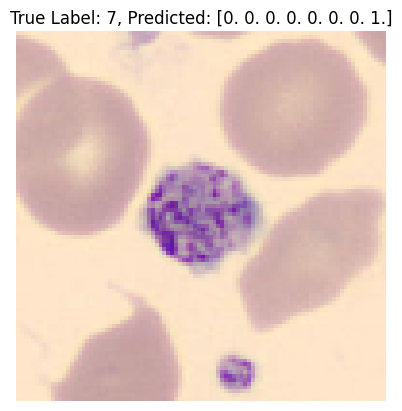

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


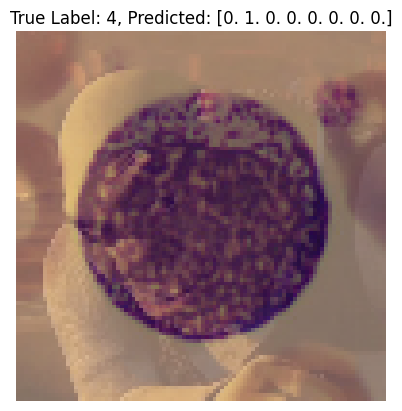

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


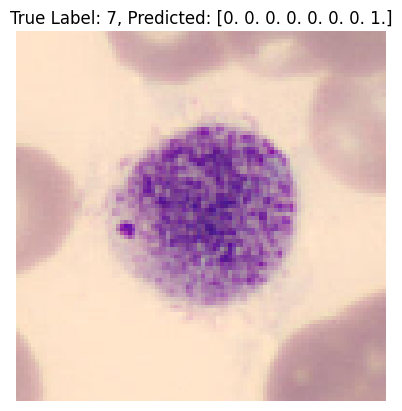

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


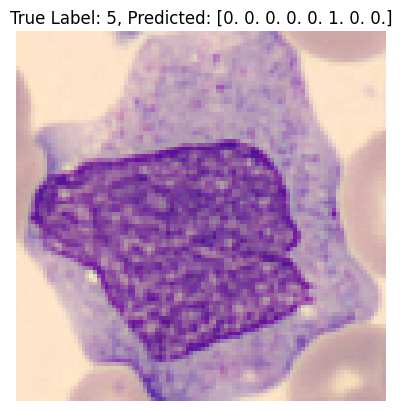

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


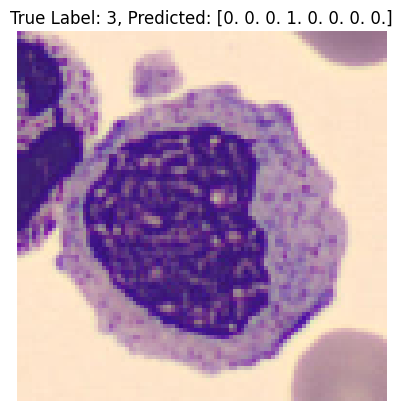

NameError: name 'confusion_matrix' is not defined

In [ ]:
import tensorflow.keras as tfk

model_path = '/content/drive/My Drive/Homework1/net_output/Net02_Train03_lr001/Net02_Train03_lr001_epoch_40.keras'
model = tfk.models.load_model(model_path)

# Instantiate and run the Test class
tester = Test(model, X_test, y_test, num_classes=params["num_classes"])
accuracy, predictions = tester.run_inference()
tester.display_predictions(num_samples=5)
tester.display_confusion_matrix(predictions)